In [1]:
#Libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from PIL import Image

In [2]:
 def GetImagesJpg(path):
    Group=[]
    filename_group=[]
    images = sorted (glob.glob(path+'/*.png'), key=len)
    for filename in images:
        im=cv2.imread(filename,0)
        Group.append(im)
        filename_group.append(filename[len(path)+1:][:-4])
    return Group,filename_group

In [3]:
def SplitImages(Images,Cuts_1,Cuts_2):
    Parts_1=[]
    Parts_2=[]
    for i in range(len(Images)):
        part1 = Images[i][:,:Cuts_1[i]]
        part2 = Images[i][:,Cuts_2[i]:]
        Parts_1.append(part1)
        Parts_2.append(part2)
    return Parts_1, Parts_2

In [4]:
def UnionImages(Image1, Image2, color=(0, 0, 0)):
    im1=Image.fromarray(Image1)
    im2=Image.fromarray(Image2)
    dst = Image.new('RGB', (im1.width + im2.width, max(im1.height, im2.height)), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [11]:
def Filter_Hist_Thresh(Images,Parts1,Parts2):
    Th_Images=[]
    for j in range(len(Images)):
        # Otsu's thresholding
        blur1 = cv2.GaussianBlur(Parts1[j][10:300,30:],(5,5),0)
        ret2,th2 = cv2.threshold(blur1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        # Otsu's thresholding after Gaussian filtering
        blur2 = cv2.GaussianBlur(Parts2[j][10:300,:-50],(5,5),0)
        ret3,th3 = cv2.threshold(blur2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
        imageRGB = (np.array(UnionImages(th2,th3)))
        imageGray = cv2.cvtColor(imageRGB, cv2.COLOR_BGR2GRAY)
        Th_Images.append(imageGray)
        
        # plot all the images and their histograms
        imgs = [blur1, 0, th2,
                blur2, 0, th3,
                Images[j], 0, imageGray]
        titles = ['Gaussian filtered Image','Histogram',"Otsu's Thresholding",
                  'Gaussian filtered Image','Histogram',"Otsu's Thresholding",
                  'Original Image','Histogram','Connected Images']

        plt.figure()
        for i in range(3):
            plt.subplot(3,3,i*3+1),plt.imshow(imgs[i*3],'gray')
            plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
            plt.subplot(3,3,i*3+2),plt.hist(imgs[i*3].ravel(),256)
            plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
            plt.subplot(3,3,i*3+3),plt.imshow(imgs[i*3+2],'gray')
            plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
            plt.show()
    return Th_Images

In [6]:
def Invert(Images):
    Imgs=Images[:,:]
    for i in range(len(Imgs)):
        Imgs[i][Imgs[i]==0]=254
        Imgs[i][Imgs[i]==255]=0
        Imgs[i][Imgs[i]==254]=255
    return Imgs

In [7]:
def FinalImages(Ori, Grad, Comp):
    titles = ['Gaussian filtered Image','Histogram',"Otsu's Thresholding",
              'Gaussian filtered Image','Histogram',"Otsu's Thresholding",
              'Original Image','Histogram','Connected Images']

    plt.figure()
    plt.subplot(3,1,1),plt.imshow(Ori,'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(3,1,2),plt.imshow(Grad,'gray')
    plt.title('Threshold and Gradient Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(3,1,3),plt.imshow(Comp,'gray')
    plt.title('Components of the Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [8]:
path='Ischemia'
B,filename_B = GetImagesJpg(path)

In [9]:
Cuts_1=[329,329,302,278,284,293,307,336,259,300,306,283,287,255,307,300,300,300]
Cuts_2=[329,329,302,278,284,293,307,336,260,302,306,283,287,255,307,300,300,300]
Parts_1,Parts_2=SplitImages(B,Cuts_1,Cuts_2)

<IPython.core.display.Javascript object>


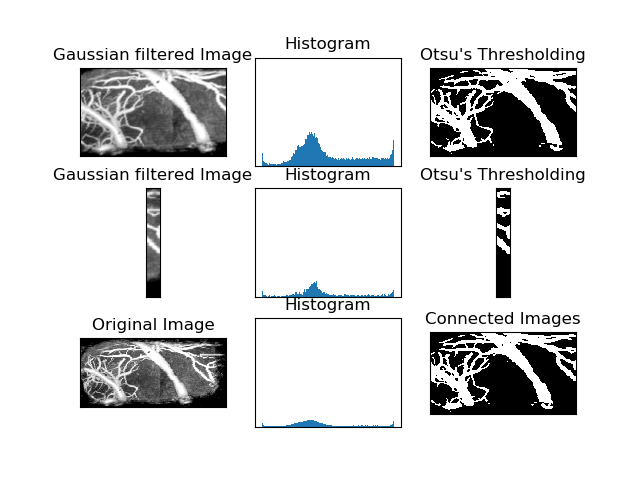

<IPython.core.display.Javascript object>


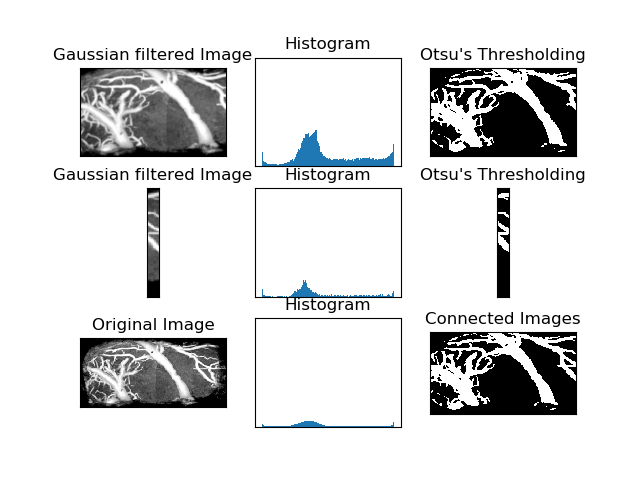

<IPython.core.display.Javascript object>


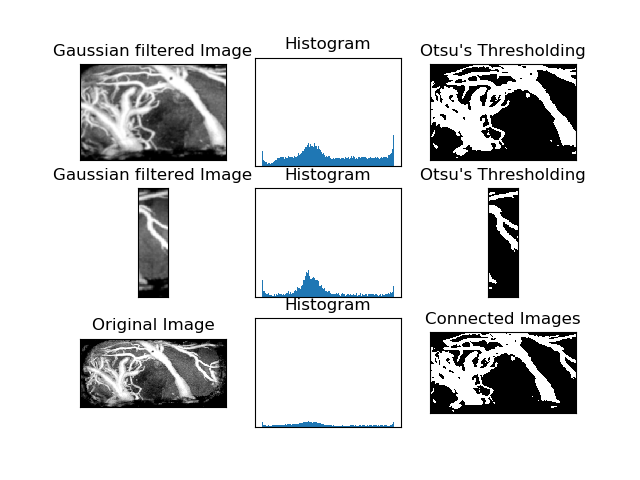

<IPython.core.display.Javascript object>


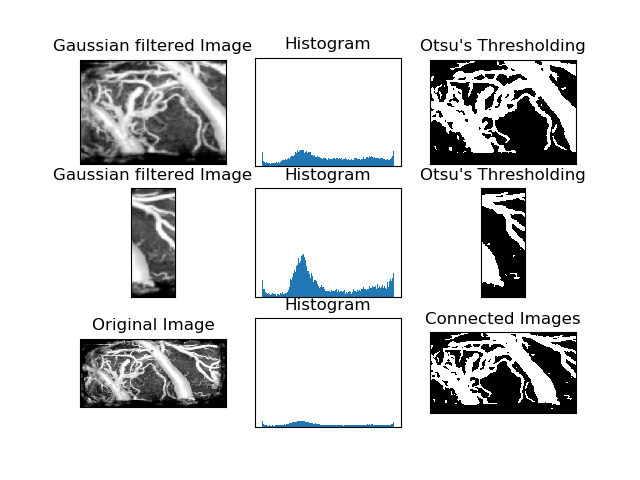

<IPython.core.display.Javascript object>


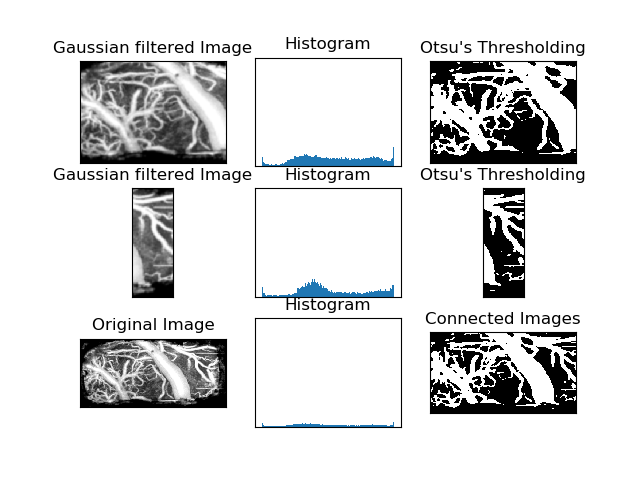

<IPython.core.display.Javascript object>


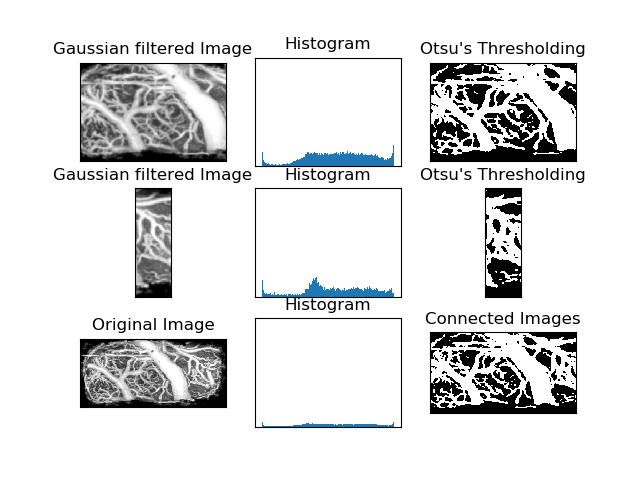

<IPython.core.display.Javascript object>


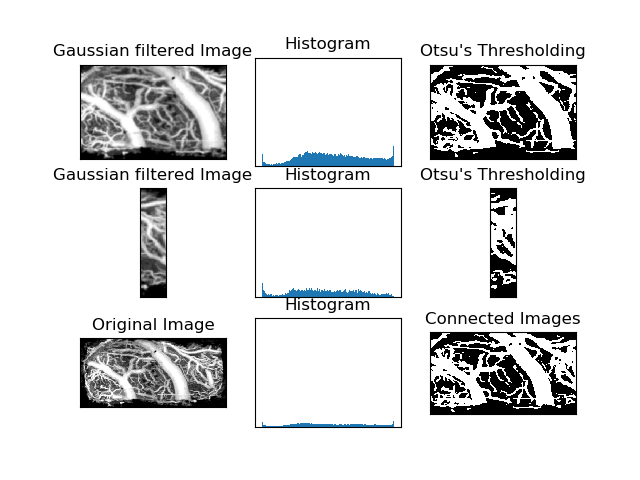

<IPython.core.display.Javascript object>


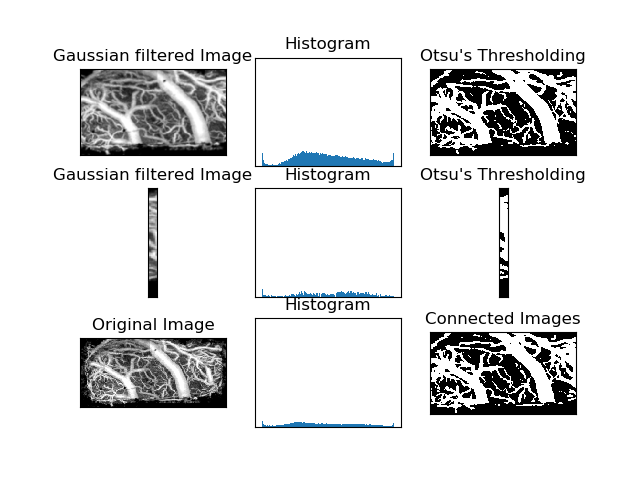

<IPython.core.display.Javascript object>


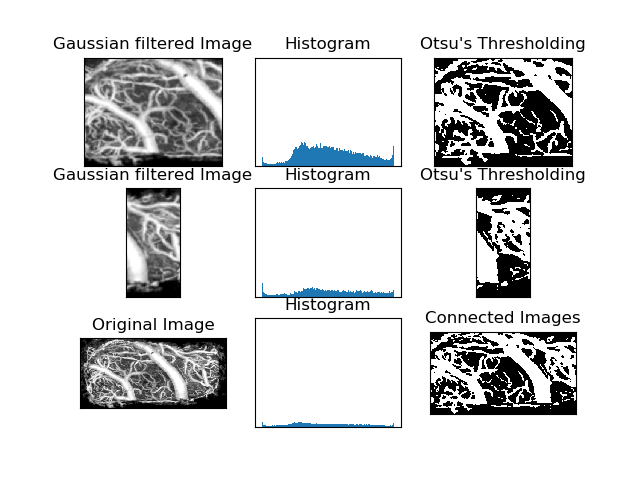

<IPython.core.display.Javascript object>


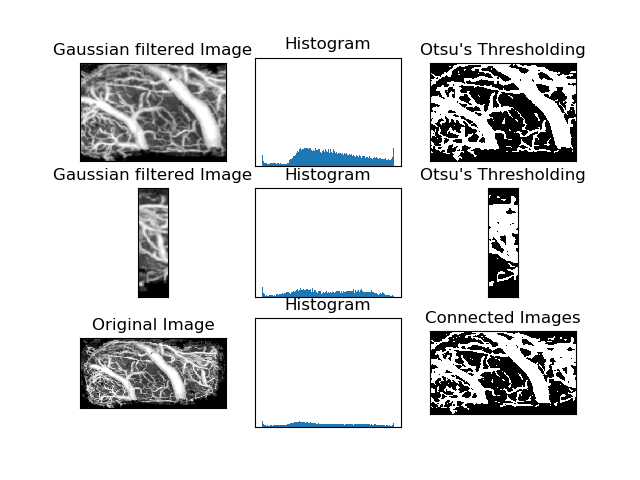

<IPython.core.display.Javascript object>


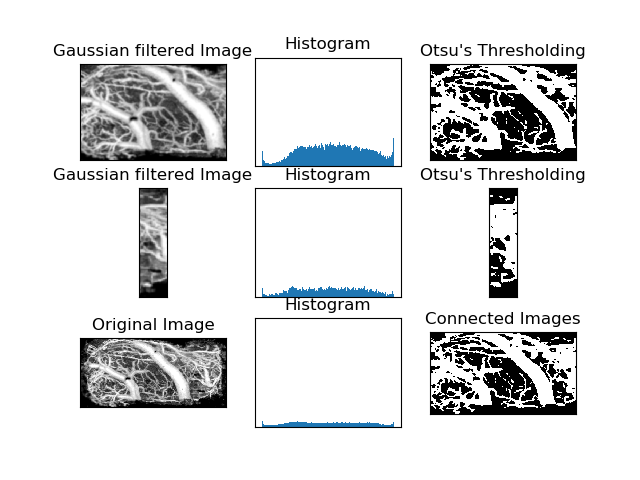

<IPython.core.display.Javascript object>


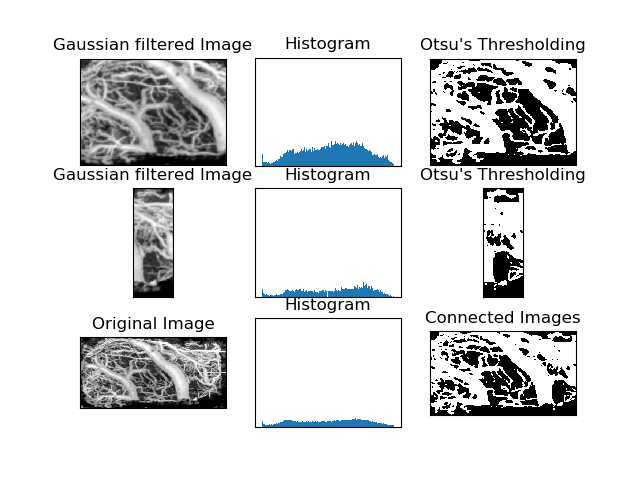

<IPython.core.display.Javascript object>


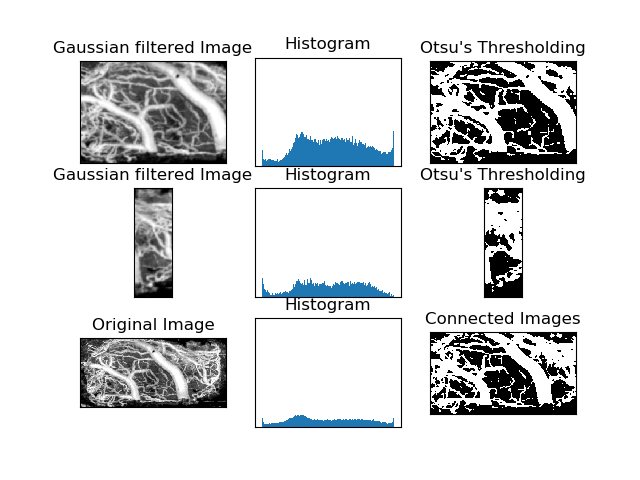

<IPython.core.display.Javascript object>


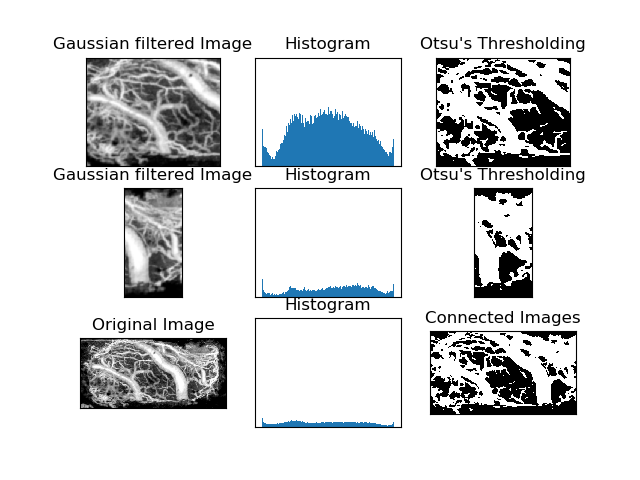

<IPython.core.display.Javascript object>


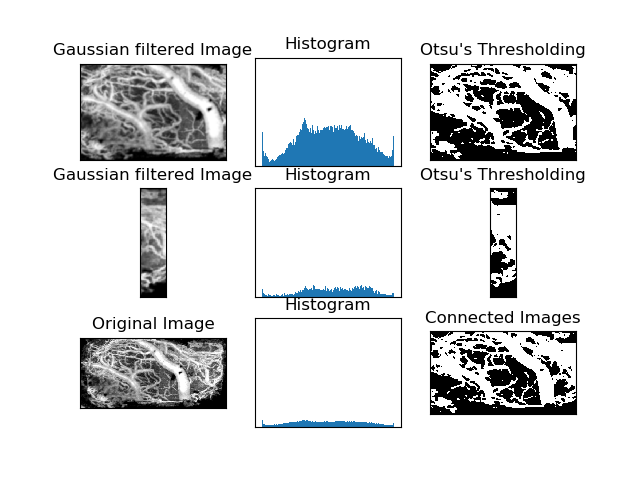

<IPython.core.display.Javascript object>


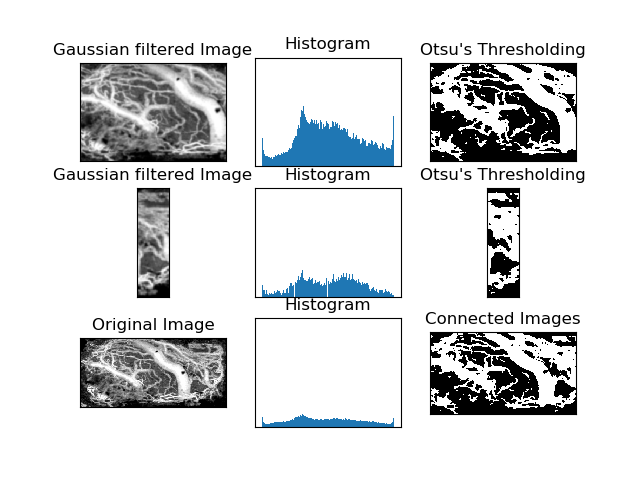

<IPython.core.display.Javascript object>


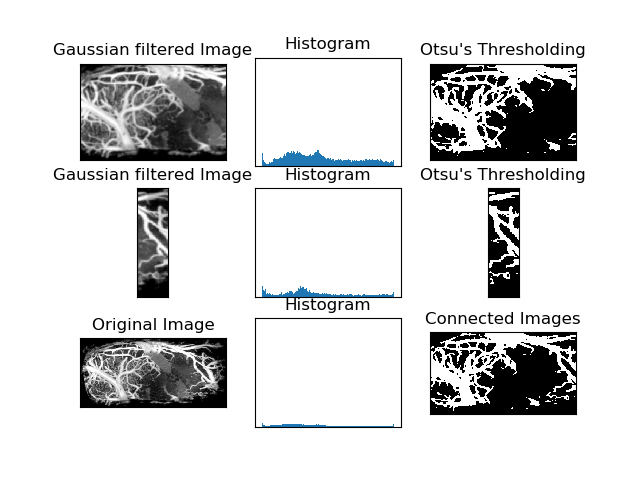

<IPython.core.display.Javascript object>


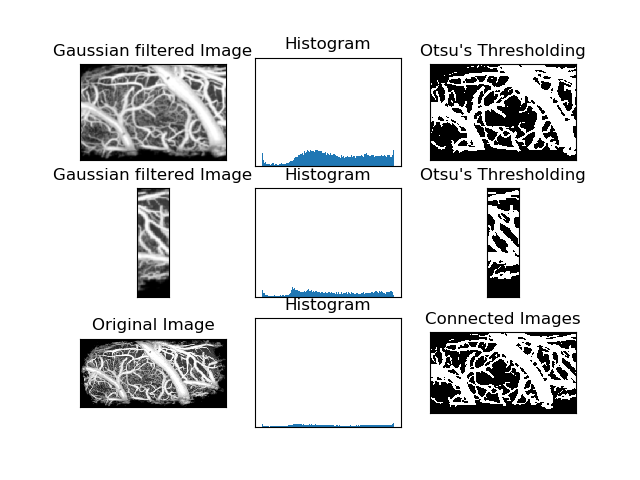

In [12]:
Th_Images=Filter_Hist_Thresh(B,Parts_1,Parts_2)

<IPython.core.display.Javascript object>


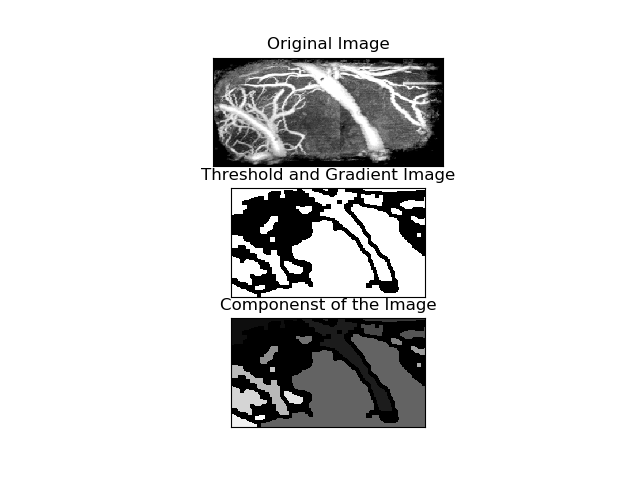

<IPython.core.display.Javascript object>


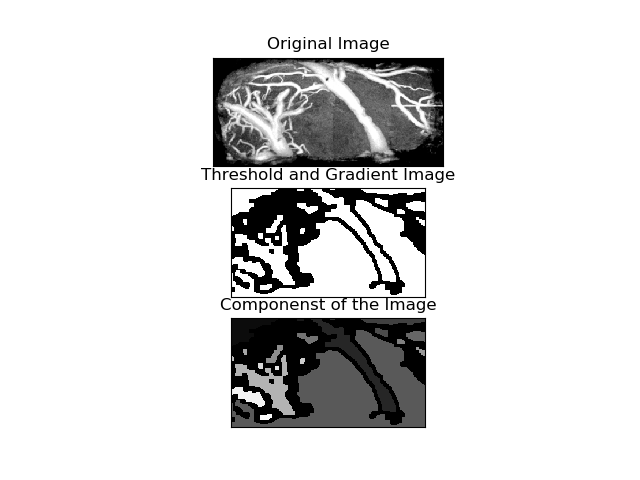

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


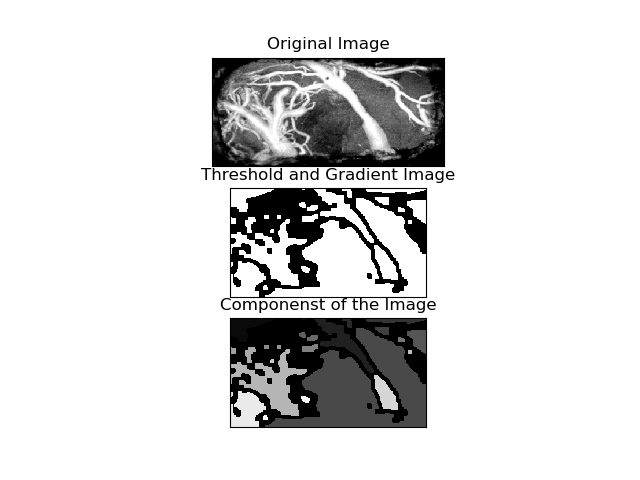

<IPython.core.display.Javascript object>


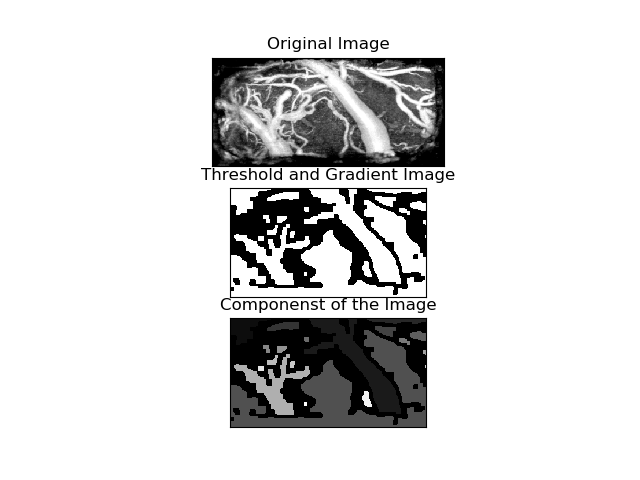

<IPython.core.display.Javascript object>


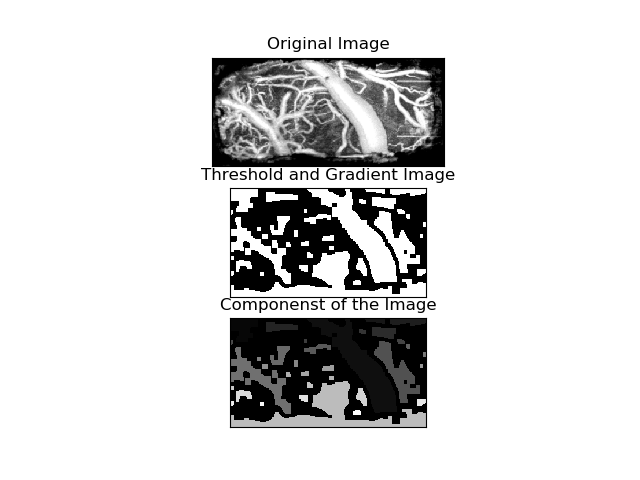

<IPython.core.display.Javascript object>


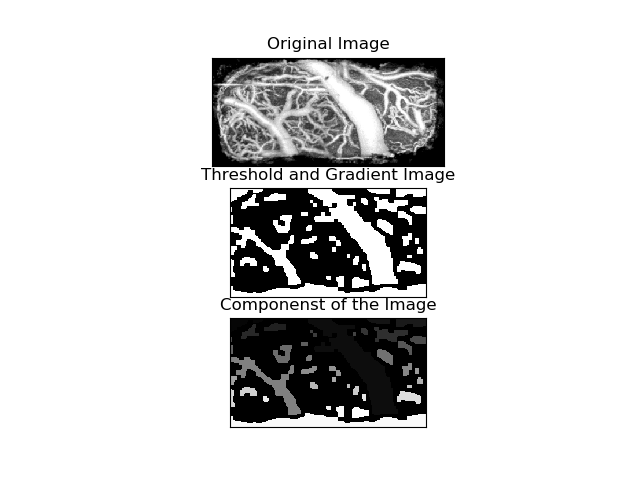

<IPython.core.display.Javascript object>


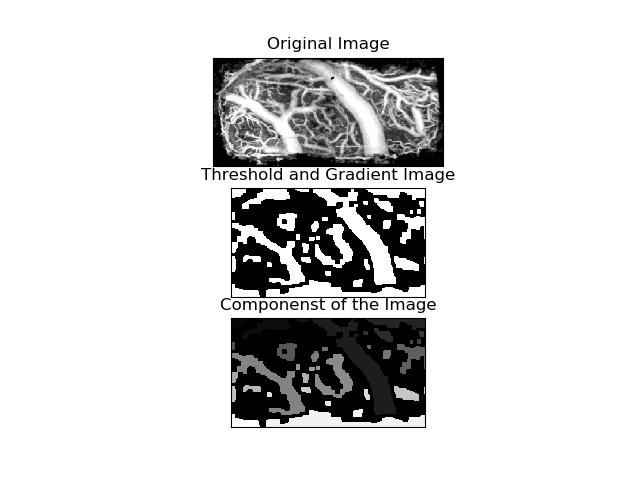

<IPython.core.display.Javascript object>


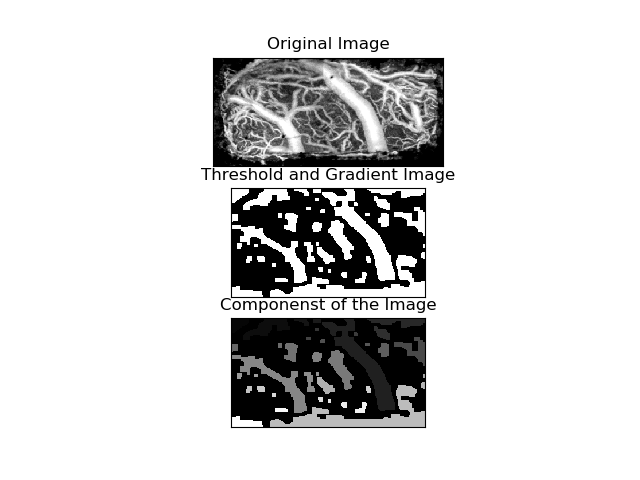

<IPython.core.display.Javascript object>


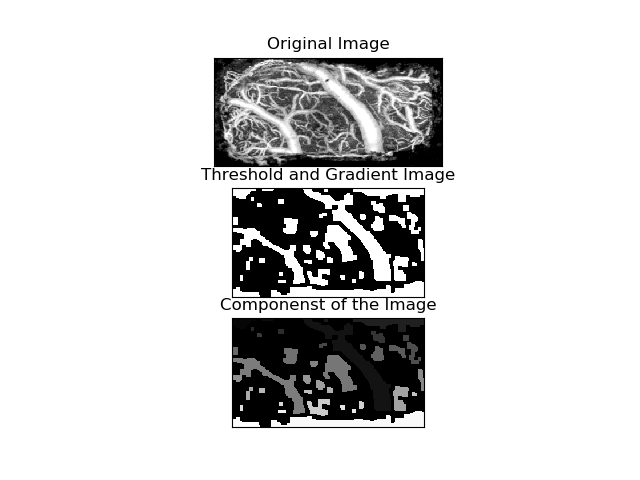

<IPython.core.display.Javascript object>


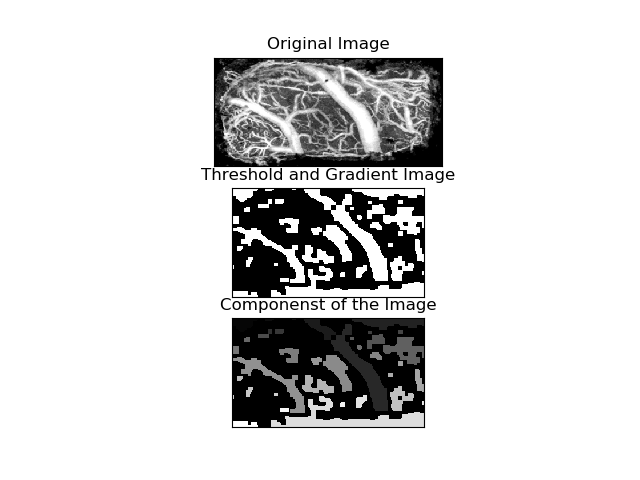

<IPython.core.display.Javascript object>


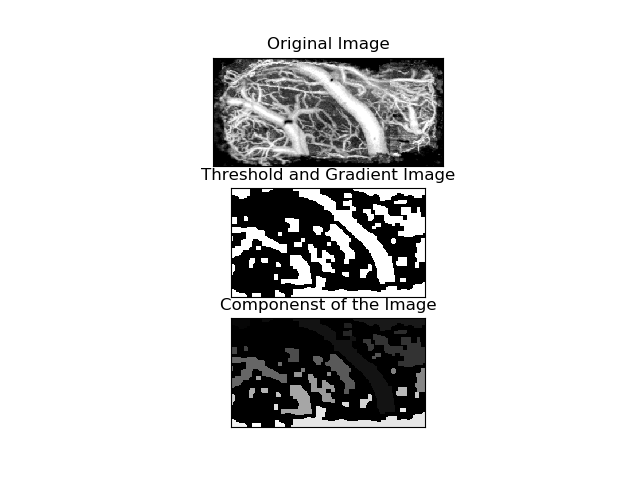

<IPython.core.display.Javascript object>


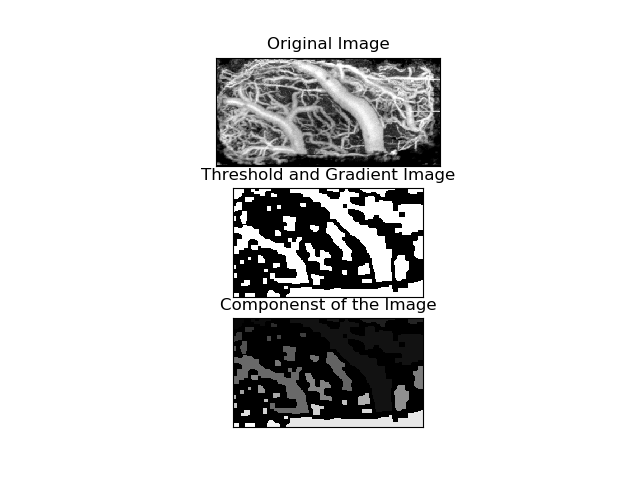

<IPython.core.display.Javascript object>


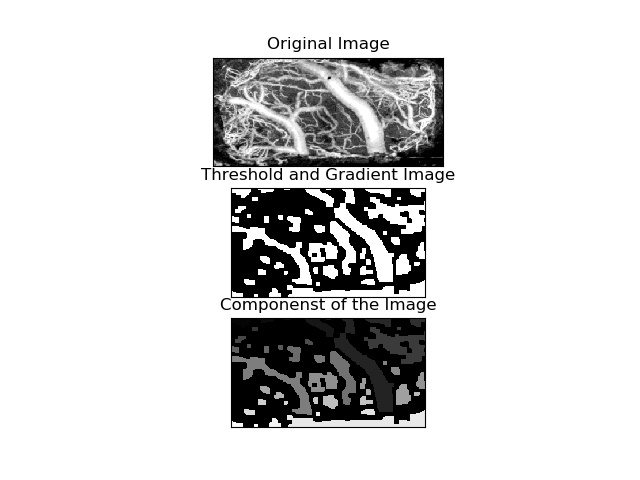

<IPython.core.display.Javascript object>


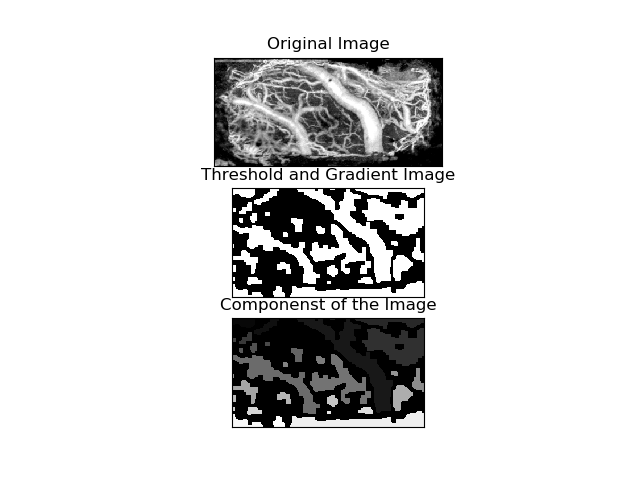

<IPython.core.display.Javascript object>


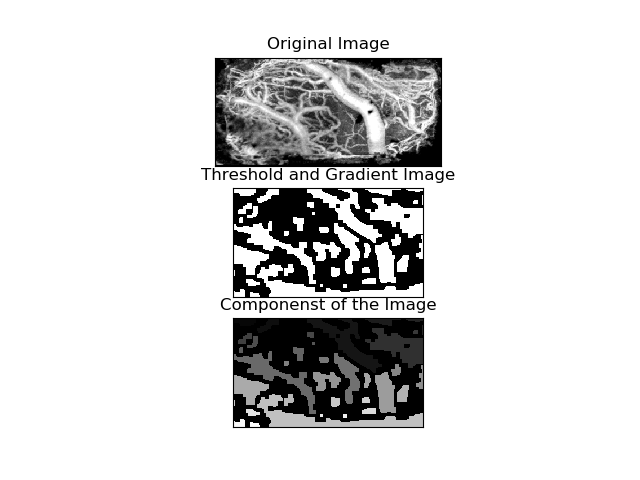

<IPython.core.display.Javascript object>


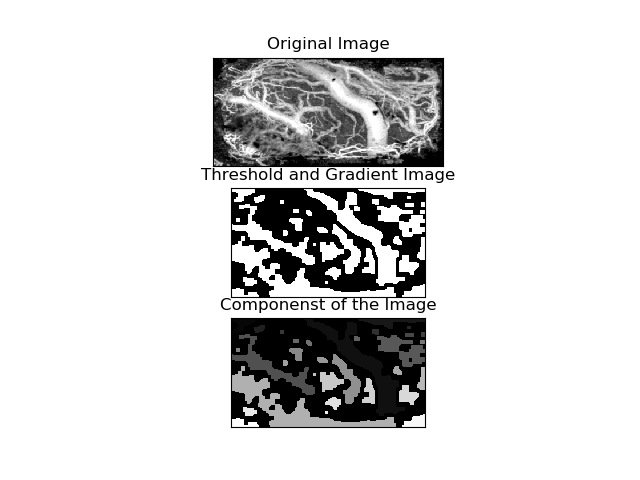

<IPython.core.display.Javascript object>


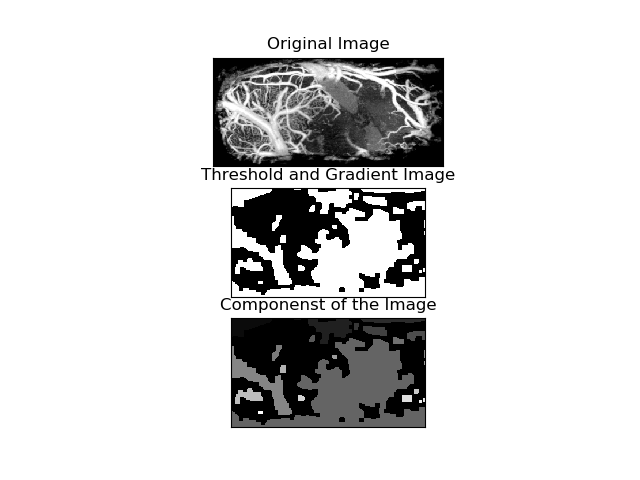

<IPython.core.display.Javascript object>


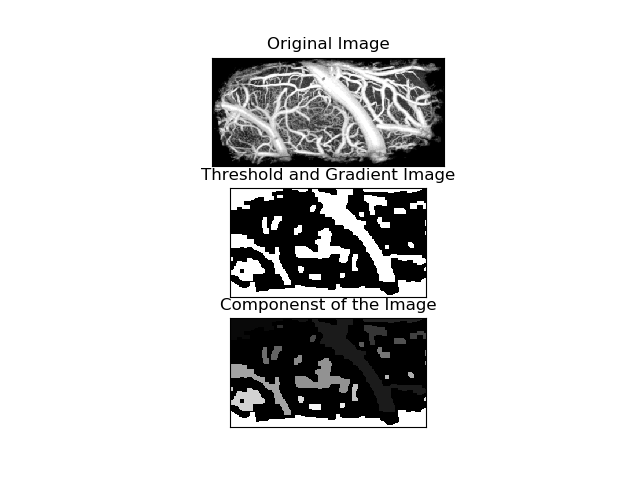

In [11]:
kernel= np.ones((6,6),np.uint8)
kernel1= np.ones((3,3),np.uint8)
for i in range (len(Th_Images)):
    MorphGrad=cv2.morphologyEx(Th_Images[i],cv2.MORPH_GRADIENT,kernel)
    MorphClose=cv2.morphologyEx(MorphGrad,cv2.MORPH_CLOSE,kernel)
    Inv=Invert(MorphClose)
    _,ImComp=cv2.connectedComponents(Inv)
    FinalImages(B[i],MorphClose, ImComp)

Coger imagen con componentes, coger los pixeles de cada componente y sacar distintas medidas de la imagen original, comparar estos valores con los del resto de imagenes para ver si podemos sacar un valor común en todas las zonas de isquemia. Todo esto para encontrar una forma en la que reconocer donde se encuentra la zona de isquemia sin tener que mirar el valor que connectedcomponents le ha dado. Despues de esto hay que cambiar el valor de la imagen a binario, donde solo salga en blanco la zona de isquemia.